# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.170912e+01     6.360302e+00
 * time: 0.0043621063232421875
     1     2.931172e+01     6.265971e+00
 * time: 0.012782096862792969
     2     2.195605e+01     5.139085e+00
 * time: 0.033094167709350586
     3     1.424589e+01     1.711165e+00
 * time: 0.057192087173461914
     4     1.138878e+01     8.367846e-01
 * time: 0.07734203338623047
     5     1.123285e+01     1.273805e+00
 * time: 0.1677260398864746
     6     1.050670e+01     1.369371e+00
 * time: 0.18364310264587402
     7     1.005320e+01     9.154337e-01
 * time: 0.19940519332885742
     8     9.856926e+00     7.046263e-01
 * time: 0.21506619453430176
     9     9.736397e+00     4.559933e-01
 * time: 0.23055815696716309
    10     9.622823e+00     3.811662e-01
 * time: 0.24585914611816406
    11     9.559846e+00     5.473489e-01
 * time: 0.2577500343322754
    12     9.522914e+00     5.880825e-01
 * time: 0.2696340084075928
    13     9.485757e+00     3.468251e-01
 * tim

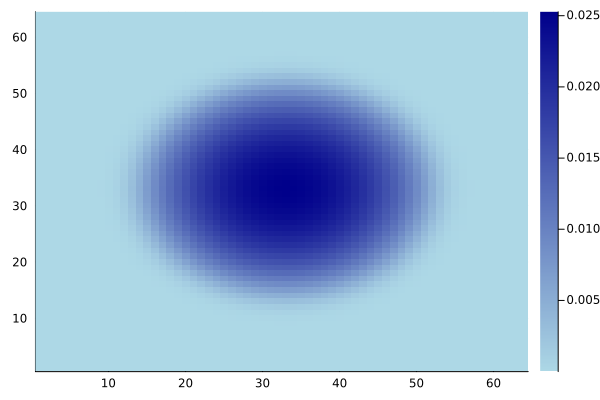

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)